<a href="https://colab.research.google.com/github/sivathmika123/Fake-Face-Detection/blob/main/miniproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from pathlib import Path
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/real_and_fake_face"

In [ ]:
# Get the list of all files in the training_real folder
real_files = list(Path(dataset_path, "training_real").rglob(  "*"))

# Get the list of all files in the training_fake folder
fake_files = list(Path(dataset_path, "training_fake").rglob("*"))


In [ ]:
# Create labels for real (1) and fake (0) data
real_labels = [1] * len(real_files)
fake_labels = [0] * len(fake_files)

In [ ]:
all_files = real_files + fake_files
all_labels = real_labels + fake_labels


train_data, test_data, train_labels, test_labels = train_test_split(
    all_files, all_labels, test_size=0.2, random_state=42
)


In [ ]:
import os
from PIL import Image
from matplotlib import pyplot as plt

root = '/content/drive/MyDrive/real_and_fake_face'

fname = os.listdir(root)
len(fname)


3

In [ ]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)
# Create data generators for training and validation
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1643 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
# Build the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator
)

Epoch 1/40
 1/52 [..............................] - ETA: 1:13 - loss: 0.3327 - accuracy: 0.9062

KeyboardInterrupt: 

In [ ]:
# Save the model
model_path = ('/content/drive/MyDrive/real_and_fake_face/trained_model.h5')
model.save('model_path.keras')

In [ ]:
# Define the load_and_preprocess_image function
def load_and_preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def visualization_activations(model, image_path, img_size, layer_name):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=img_size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    # Find the layer in the model
    # Use actual layer names from your model definition
    layer_output = model.get_layer(layer_name).output

    # Create a model that outputs the activations of the specified layer
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)

    # Get the activations for the input image
    activations = activation_model.predict(img_tensor)

    # Plot the activations (You'll need to add plotting logic here)
    num_filters = activations.shape[-1]
    # ... (Add your plotting code)

#Example usage
visualization_image_path = "/content/drive/MyDrive/real_and_fake_face/training_fake/easy_102_0101.jpg"
# Correct layer names based on your model definition
for layer_name in ['conv2d_5','conv2d_6','conv2d_7','conv2d_8','conv2d_9']:
  visualization_activations(model,visualization_image_path,img_size,layer_name)
# Example: Path to a new image for testing
new_image_path = "/content/drive/MyDrive/divya.jpg"

# Load and preprocess the new image
new_image = load_and_preprocess_image(new_image_path, img_size)

# Make predictions using the trained model
predictions = model.predict(new_image)

# Print the probability of being fake (class 0) and real (class 1)
probability_fake = predictions[0][0]
probability_real = 1 - probability_fake

print("Probability of being Fake:", probability_fake)
print("Probability of being Real:", probability_real)

# Classify as Fake or Real based on a threshold (e.g., 0.5)
predicted_class = 0 if probability_fake >= 0.5 else 1
print("Predicted Class:", predicted_class)



1/1 [==============================] - 0s 17ms/step
Probability of being Fake: 0.89872044
Probability of being Real: 0.10127955675125122
Predicted Class: 0


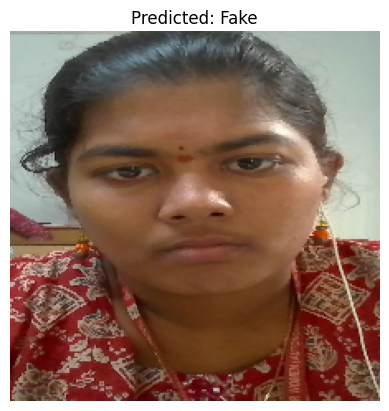

In [ ]:
# Display the image
img = image.load_img(new_image_path, target_size=img_size)
plt.imshow(img)
plt.title(f"Predicted: {'Fake' if predicted_class == 0 else 'Real'}")
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
# Install necessary libraries
!pip install streamlit pyngrok

In [ ]:
# Set up Ngrok and create a tunnel
from pyngrok import ngrok

# Replace 'your_authtoken_here' with your actual ngrok authtoken
ngrok.set_auth_token('2j8AisPP9vybKev60nNO4CsL2eZ_4vGAQQUo6x85HPB6BjaZ6')

# Terminate open tunnels if any
ngrok.kill()

# Create a new tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

# Write the Streamlit app to a file
app_code = """
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load your trained model
model = load_model('/content/drive/MyDrive/real_and_fake_face/trained_model.h5')
img_size = (224, 224)

# Define the load_and_preprocess_image function
def load_and_preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Streamlit app
st.title("Deepfake Detection")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Save the uploaded file to the uploads directory
    with open(os.path.join("uploads", uploaded_file.name), "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.image(uploaded_file, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the uploaded image
    img_path = os.path.join("uploads", uploaded_file.name)
    img = load_and_preprocess_image(img_path, img_size)

    # Make predictions
    predictions = model.predict(img)
    probability_fake = predictions[0][0]
    probability_real = 1 - probability_fake

    st.write(f"Probability of being Fake: {probability_fake:.2f}")
    st.write(f"Probability of being Real: {probability_real:.2f}")

    predicted_class = 'Fake' if probability_fake >= 0.5 else 'Real'
    st.write(f"Predicted Class: {predicted_class}")
"""

with open("app.py", "w") as f:
    f.write(app_code)

# Create the uploads directory
os.makedirs("uploads", exist_ok=True)

# Run the Streamlit app
!streamlit run app.py &>/dev/null&

Streamlit app is live at: NgrokTunnel: "https://9e7d-104-155-192-22.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Create the uploads directory
os.makedirs("uploads", exist_ok=True)

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://9e7d-104-155-192-22.ngrok-free.app" -> "http://localhost:8501"
